<a href="https://colab.research.google.com/github/ananghw/careline-data-analyst/blob/main/Coway_Careline_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal of the following flow is to help users (team lead, supervisor or manager) identify or monitor important metrics in the call center system. The dummy data shows records in the month of July up until now

# Data Preparation

## Import Data Source and Library

In [36]:
#IMPORT LIBRARY
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [37]:
#IMPORT DATASOURCE
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/2. WORK 💻/simulated_call_center_data_reduced.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df.head()

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec)
0,CALL-000001,2025-07-17,18:17:15,18:31:40,Frank,Answered,5.0,Outbound,Phone,CUST-9436,Account,No,35.0
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN
2,CALL-000003,2025-07-03,15:38:43,15:48:47,Grace,Answered,4.0,Outbound,Email,CUST-1517,Account,Yes,79.0
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0
4,CALL-000005,2025-07-21,18:55:46,19:08:37,Bob,Answered,4.0,Inbound,Webchat,CUST-4984,Complaint,Yes,88.0


In [39]:
#GET DATASOURCE INFORMATION
# Get a concise summary of the dataframe
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Call ID               10000 non-null  object 
 1   Date                  10000 non-null  object 
 2   Start Time            10000 non-null  object 
 3   End Time              10000 non-null  object 
 4   Agent Name            10000 non-null  object 
 5   Status                10000 non-null  object 
 6   CSAT Rating           7555 non-null   float64
 7   Call Type             10000 non-null  object 
 8   Channel               10000 non-null  object 
 9   Customer ID           10000 non-null  object 
 10  Issue Category        10000 non-null  object 
 11  Resolved During Call  8468 non-null   object 
 12  Wait Time (sec)       8468 non-null   float64
dtypes: float64(2), object(11)
memory usage: 1015.8+ KB
None
       CSAT Rating  Wait Time (sec)
count  7555.000000      8468.0

# Data Cleaning

##1. Check and Adjust Data Type

Before we continue to explore the data, we must make sure that every columns has it's correct type

In [40]:
#ADJUST DATA TYPE
df['Date'] = pd.to_datetime(df['Date'])
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S').dt.time
df['End Time'] = pd.to_datetime(df['End Time'], format='%H:%M:%S').dt.time

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Call ID               10000 non-null  object        
 1   Date                  10000 non-null  datetime64[ns]
 2   Start Time            10000 non-null  object        
 3   End Time              10000 non-null  object        
 4   Agent Name            10000 non-null  object        
 5   Status                10000 non-null  object        
 6   CSAT Rating           7555 non-null   float64       
 7   Call Type             10000 non-null  object        
 8   Channel               10000 non-null  object        
 9   Customer ID           10000 non-null  object        
 10  Issue Category        10000 non-null  object        
 11  Resolved During Call  8468 non-null   object        
 12  Wait Time (sec)       8468 non-null   float64       
dtypes: datetime64[ns]

## Check for Null Values

In [41]:
#CHECKING DUPLICATE
pd.isnull(df).sum()

,0
Call ID,0
Date,0
Start Time,0
End Time,0
Agent Name,0
Status,0
CSAT Rating,2445
Call Type,0
Channel,0
Customer ID,0


Apparently there are null values in the **CSAT Rating**, **Resolved During Calls** and **Wait Time**. We assume this is due to *uncompleted tickets*. We will check one of the null columns (CSAT Ratings)

In [44]:
df[df['CSAT Rating'].isnull()].head(10)

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec)
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0
8,CALL-000009,2025-07-23,15:37:30,15:40:04,Grace,Missed,NaN,Inbound,Email,CUST-9713,Technical,NaN,NaN
15,CALL-000016,2025-07-04,16:43:02,16:46:02,Bob,Missed,NaN,Outbound,Webchat,CUST-3462,Complaint,NaN,NaN
16,CALL-000017,2025-07-19,12:58:42,13:04:30,Bob,Answered,NaN,Outbound,WhatsApp,CUST-5120,Technical,Yes,46.0
18,CALL-000019,2025-07-13,18:11:40,18:26:37,Diana,Missed,NaN,Outbound,Webchat,CUST-8673,Complaint,NaN,NaN
22,CALL-000023,2025-07-20,09:41:00,09:50:06,Alice,Missed,NaN,Outbound,Webchat,CUST-2897,Complaint,NaN,NaN
24,CALL-000025,2025-07-03,11:19:34,11:33:04,Alice,Missed,NaN,Outbound,WhatsApp,CUST-3204,Technical,NaN,NaN
28,CALL-000029,2025-07-15,13:30:12,13:37:21,Hank,Answered,NaN,Inbound,WhatsApp,CUST-6092,General Inquiry,No,90.0
39,CALL-000040,2025-07-24,10:14:38,10:31:59,Eve,Answered,NaN,Inbound,Webchat,CUST-8177,Billing,Yes,57.0


In [45]:
df[df['CSAT Rating'].isnull()]['Status'].value_counts()

,count
Status,
Missed,1532
Answered,913


Upon checking it is noticeable that the missing value in the CSAT rating comes from either **Missed** Tickets or **Unresolved** Cased during the complaints. It is important to adressed this kind of metrics related to the SLA Compliance to the related stakeholders. For further exploration and analysis, i'm not going to remove this null value

##Check Duplicates

In [46]:
call = df.copy()
print('length of order dataset before =',+(len(df)))
call.drop_duplicates(inplace=True)
print('length of order dataset without duplicate =',+(len(call)))
print('length of original order dataset =',+(len(df)))

length of order dataset before = 10000
length of order dataset without duplicate = 10000
length of original order dataset = 10000


As we can see there are no duplicates record in the data

## Check Outlier

For numerical columns such as CSAT Rating and Wait Time we're going to check the distribution of value using boxplot

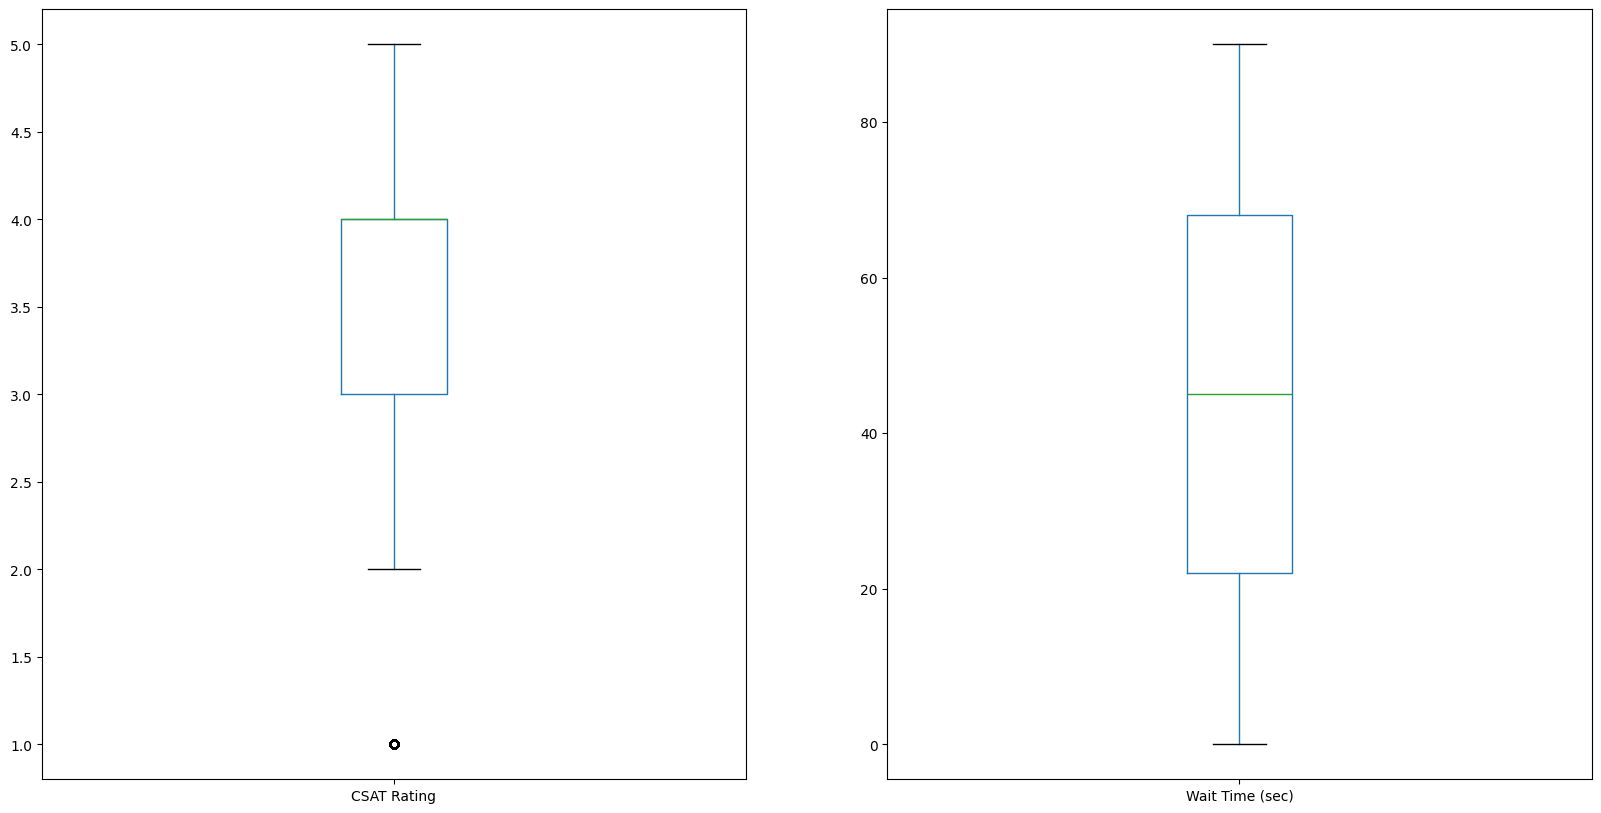

In [47]:
call.columns
numerical_column = ['CSAT Rating','Wait Time (sec)']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = call.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

For CSAT Rating, most records show the rating of 3.0 - 4.0, only one record of data shows rating of 1.0. The wait time shows range of waiting time from 0 to 100 seconds, with the average wait time around 45 seconds overall. For now we're going to leave the data as it is

# Exploratory Data Analysis

## Total Tickets

The simplest thing that we could do is calculate the total number of tickets from the data. Each records was equipped with the status of the tickets, whether it is Answered or Missed

In [48]:
call.head()

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec)
0,CALL-000001,2025-07-17,18:17:15,18:31:40,Frank,Answered,5.0,Outbound,Phone,CUST-9436,Account,No,35.0
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN
2,CALL-000003,2025-07-03,15:38:43,15:48:47,Grace,Answered,4.0,Outbound,Email,CUST-1517,Account,Yes,79.0
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0
4,CALL-000005,2025-07-21,18:55:46,19:08:37,Bob,Answered,4.0,Inbound,Webchat,CUST-4984,Complaint,Yes,88.0


In [49]:
# Calculate the total number of tickets
total_tickets = call.shape[0]
print(f"Total number of tickets: {total_tickets}")

# Show the number of answered and missed tickets
status_counts = call['Status'].value_counts()
print("\nTicket status breakdown:")
print(status_counts)

Total number of tickets: 10000

Ticket status breakdown:
Status
Answered    8468
Missed      1532
Name: count, dtype: int64


## Resolution Rate

Resolution rate shows the number of Answered tickets from the total tickets in the dataset. The higher the rate means better performance of the call center team as it is shows that they can handle and help customer solve their issues

In [16]:
# Filter for answered calls
answered_calls = call[call['Status'] == 'Answered']

# Calculate the number of resolved calls
resolved_calls = answered_calls[answered_calls['Resolved During Call'] == 'Yes'].shape[0]

# Calculate the total number of answered calls
total_answered_calls = answered_calls.shape[0]

# Calculate the resolution rate
resolution_rate = (resolved_calls / total_answered_calls) * 100

print(f"Overall Resolution Rate: {resolution_rate:.2f}%")

Overall Resolution Rate: 50.58%


The resolution rate is still quite low which indicates the low performance of the team or the high volume of the tickets that led to unfinished solution offered by the team. We can check the resolution rate of each agents and issue category

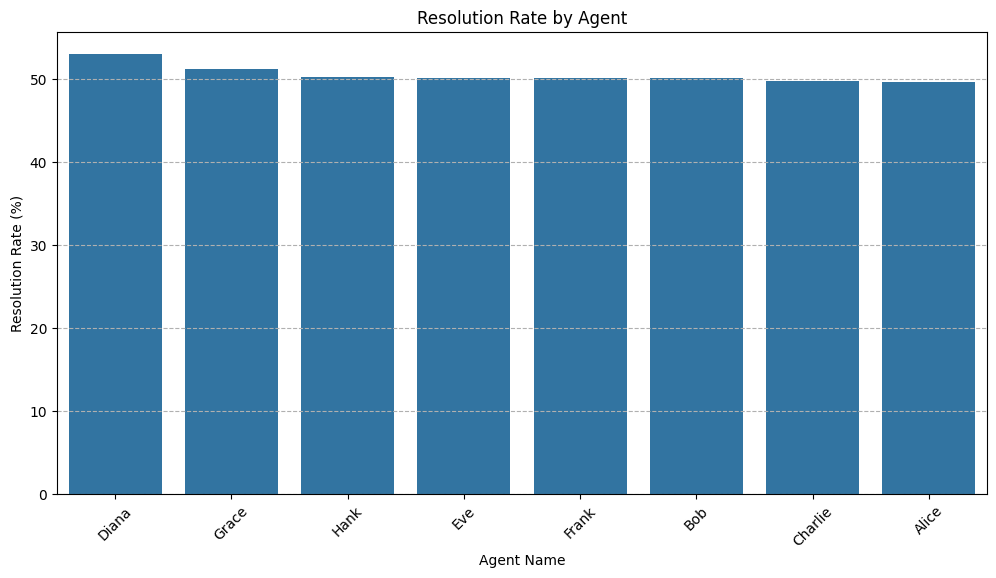

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate resolution rate by agent for answered calls
resolution_by_agent = call[call['Status'] == 'Answered'].groupby('Agent Name')['Resolved During Call'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).reset_index(name='Resolution Rate')

# Sort the data by resolution rate in descending order
resolution_by_agent = resolution_by_agent.sort_values(by='Resolution Rate', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Name', y='Resolution Rate', data=resolution_by_agent)
plt.title('Resolution Rate by Agent')
plt.xlabel('Agent Name')
plt.ylabel('Resolution Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

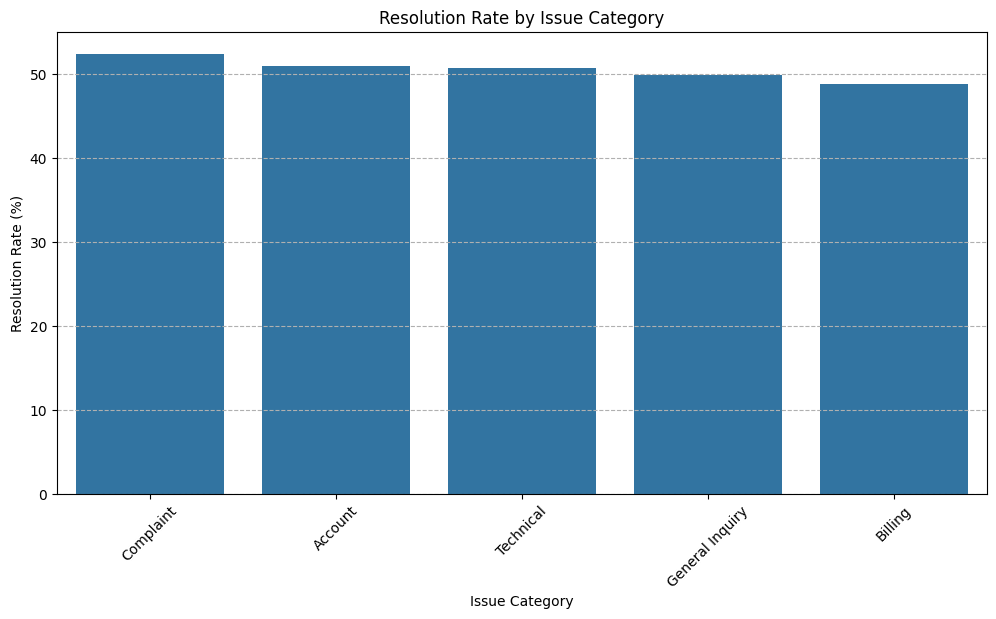

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate resolution rate by issue category for answered calls
resolution_by_issue = call[call['Status'] == 'Answered'].groupby('Issue Category')['Resolved During Call'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).reset_index(name='Resolution Rate')

# Sort the data by resolution rate in descending order
resolution_by_issue = resolution_by_issue.sort_values(by='Resolution Rate', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Issue Category', y='Resolution Rate', data=resolution_by_issue)
plt.title('Resolution Rate by Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Resolution Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Customer Satisfaction Rate

In [19]:
# Calculate the overall Customer Satisfaction Rate
overall_csat = call['CSAT Rating'].mean()

print(f"Overall CSAT Rating: {overall_csat:.2f}")

Overall CSAT Rating: 3.61


The overall customer satisfaction rate is 3.61 out of 5.00. Generally this score is average that still opens room for improvement. This score suggest that customers are not unhappy but not excitingly satisfied with the performance of the call center team. For further checking, we will try to filter out 4-5 score and check which agents, channels or issue type that might correlate to the low score (1-3)

In [53]:
low_csat_calls = call[(call['CSAT Rating'] <= 3) | (call['CSAT Rating'].isnull())]
low_csat_calls.head()

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec)
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0
6,CALL-000007,2025-07-31,19:19:13,19:27:07,Grace,Answered,3.0,Inbound,Phone,CUST-2140,General Inquiry,Yes,22.0
8,CALL-000009,2025-07-23,15:37:30,15:40:04,Grace,Missed,NaN,Inbound,Email,CUST-9713,Technical,NaN,NaN
10,CALL-000011,2025-07-15,11:28:26,11:34:04,Charlie,Answered,3.0,Inbound,Email,CUST-4490,Billing,No,55.0


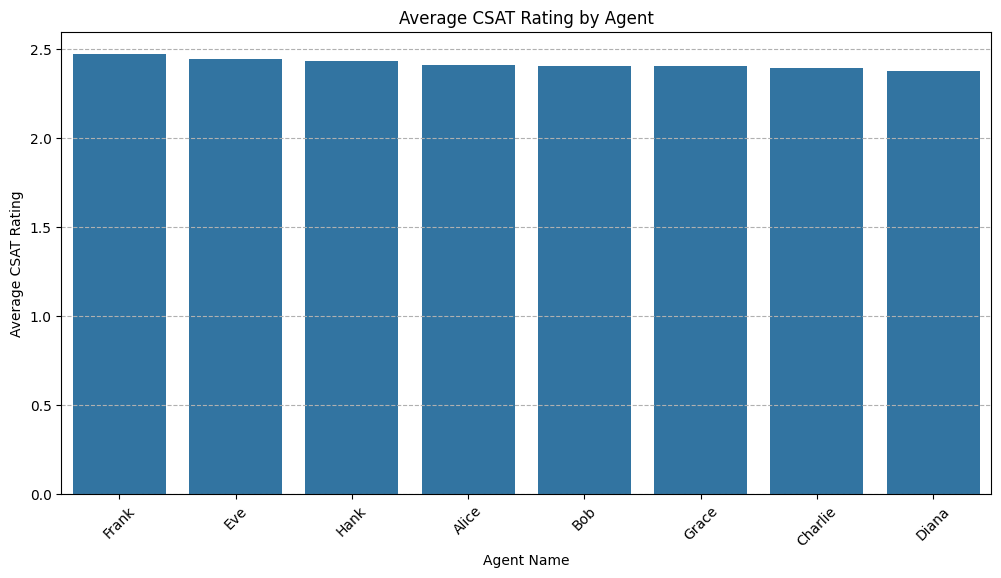

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average CSAT rating by agent
avg_csat_agent = low_csat_calls.groupby('Agent Name')['CSAT Rating'].mean().reset_index()
avg_csat_agent = avg_csat_agent.sort_values(by='CSAT Rating', ascending=False)


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Name', y='CSAT Rating', data=avg_csat_agent)
plt.title('Average CSAT Rating by Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average CSAT Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

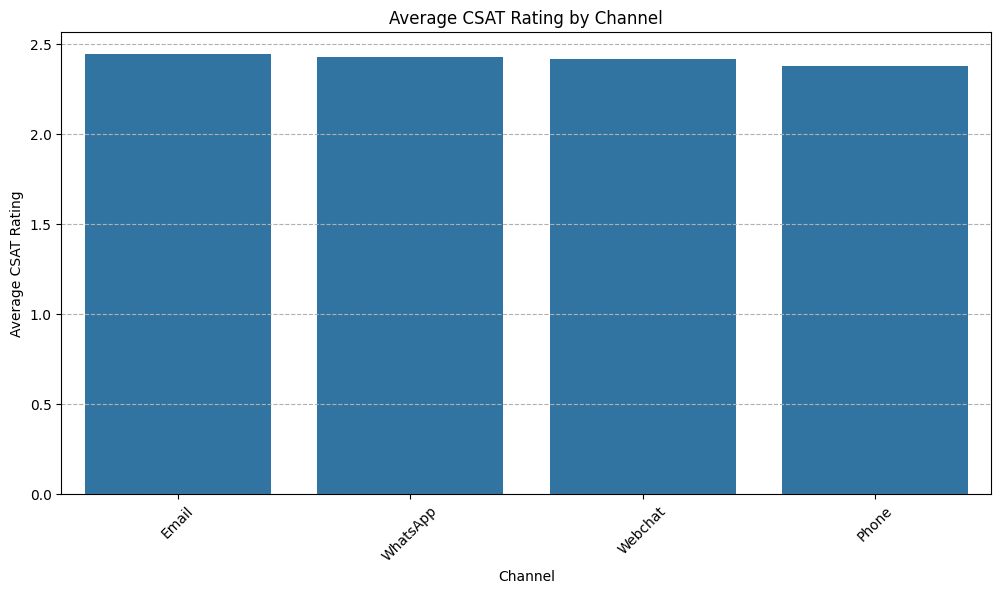

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average CSAT rating by agent
avg_csat_channel = low_csat_calls.groupby('Channel')['CSAT Rating'].mean().reset_index()
avg_csat_channel = avg_csat_channel.sort_values(by='CSAT Rating', ascending=False)


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='CSAT Rating', data=avg_csat_channel)
plt.title('Average CSAT Rating by Channel')
plt.xlabel('Channel')
plt.ylabel('Average CSAT Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

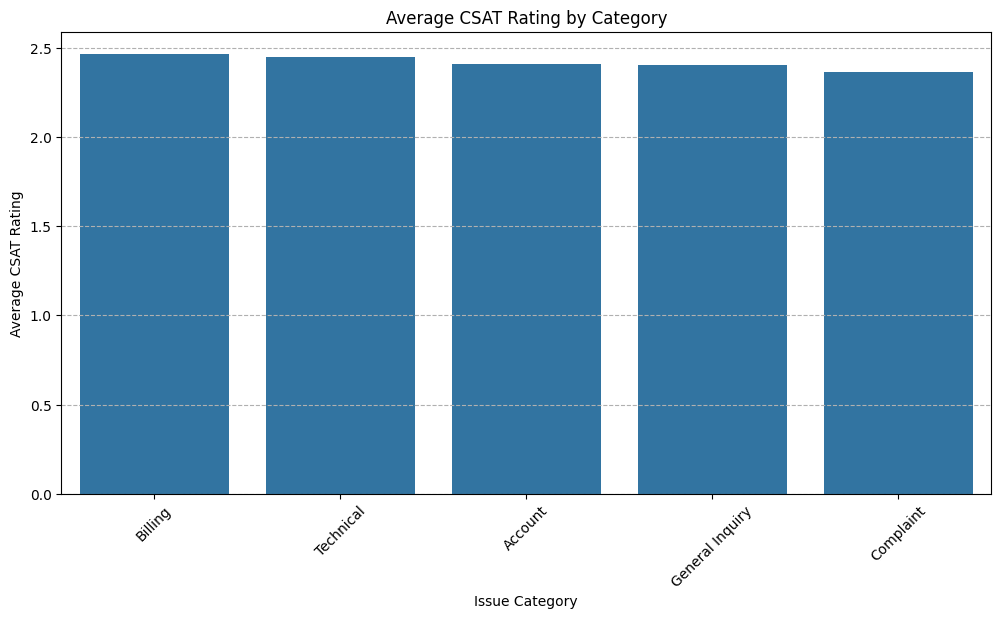

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average CSAT rating by agent
avg_csat_cat = low_csat_calls.groupby('Issue Category')['CSAT Rating'].mean().reset_index()
avg_csat_cat = avg_csat_cat.sort_values(by='CSAT Rating', ascending=False)


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Issue Category', y='CSAT Rating', data=avg_csat_cat)
plt.title('Average CSAT Rating by Category')
plt.xlabel('Issue Category')
plt.ylabel('Average CSAT Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Average Wait Time / Hold Time

The waiting time is the time period between the first time customer reaching out to the call center and the time that the agent first responding

In [58]:
# Calculate the overall average wait time
overall_avg_wait_time = call['Wait Time (sec)'].mean()

print(f"Overall Average Wait Time: {overall_avg_wait_time:.2f} seconds")

Overall Average Wait Time: 45.18 seconds


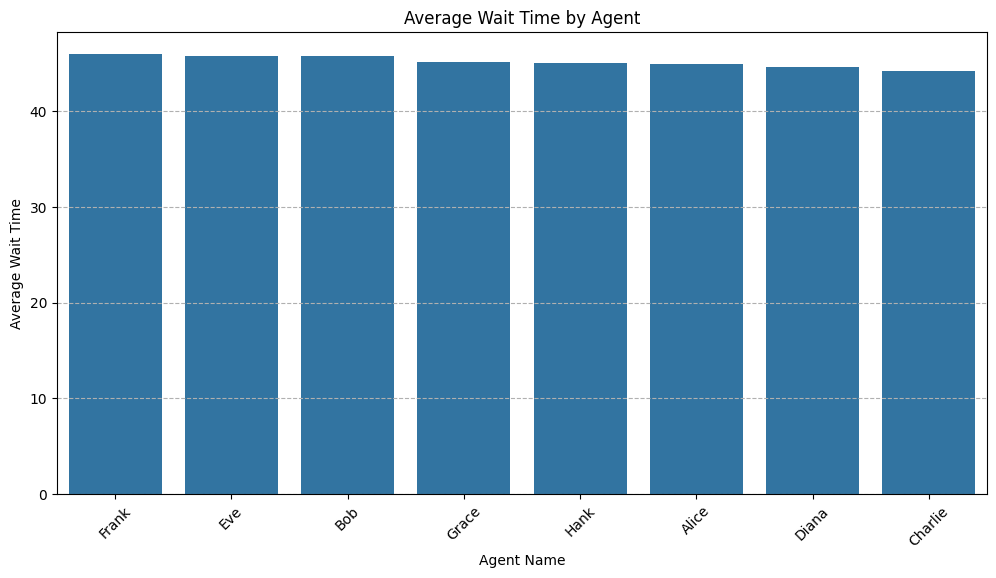

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average wait time by agent
avg_wait_agent = call.groupby('Agent Name')['Wait Time (sec)'].mean().reset_index()
avg_wait_agent = avg_wait_agent.sort_values(by='Wait Time (sec)', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Name', y='Wait Time (sec)', data=avg_wait_agent)
plt.title('Average Wait Time by Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Wait Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

It appears the average CSAT rating is fairly consistent across all agents, with most falling between 3.5 and 3.7.

To get a more complete picture of agent performance, it would be interesting to see if there's a relationship between these two metrics. For example, do agents with lower handling times also have higher CSAT scores?

A scatter plot would be a great way to visualize this. We can plot the average handling time on one axis and the average CSAT rating on the other, with each point representing an agent

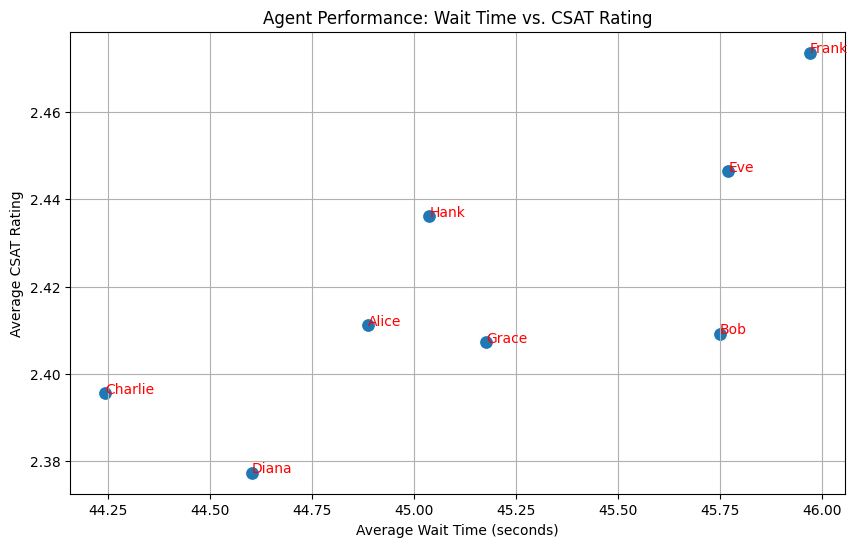

In [61]:
# Merge the average wait time and CSAT rating dataframes
agent_performance = pd.merge(avg_wait_agent, avg_csat_agent, on='Agent Name')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wait Time (sec)', y='CSAT Rating', data=agent_performance, s=100)

# Add labels for each agent
for i in range(agent_performance.shape[0]):
    plt.text(x=agent_performance['Wait Time (sec)'][i]+0.0,
             y=agent_performance['CSAT Rating'][i]+0.0,
             s=agent_performance['Agent Name'][i],
             fontdict=dict(color='red',size=10))

plt.title('Agent Performance: Wait Time vs. CSAT Rating')
plt.xlabel('Average Wait Time (seconds)')
plt.ylabel('Average CSAT Rating')
plt.grid(True)
plt.show()

## Average Handling Time

The handling time refers to the time period between the Start Time and End Time of each customers complaints

In [62]:
# Combine Date and Time columns to create datetime objects
call['Start DateTime'] = pd.to_datetime(call['Date'].astype(str) + ' ' + call['Start Time'].astype(str))
call['End DateTime'] = pd.to_datetime(call['Date'].astype(str) + ' ' + call['End Time'].astype(str))

# Calculate Handling Time
call['Handling Time'] = call['End DateTime'] - call['Start DateTime']

# Display the new column
print(call[['Start DateTime', 'End DateTime', 'Handling Time']].head())

       Start DateTime        End DateTime   Handling Time
0 2025-07-17 18:17:15 2025-07-17 18:31:40 0 days 00:14:25
1 2025-07-07 18:42:42 2025-07-07 18:43:51 0 days 00:01:09
2 2025-07-03 15:38:43 2025-07-03 15:48:47 0 days 00:10:04
3 2025-07-05 08:38:36 2025-07-05 08:43:52 0 days 00:05:16
4 2025-07-21 18:55:46 2025-07-21 19:08:37 0 days 00:12:51


In [63]:
call['Handling Time (sec)'] = call['Handling Time'].dt.total_seconds()
call.tail()

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec),Start DateTime,End DateTime,Handling Time,Handling Time (sec)
9995,CALL-009996,2025-07-13,12:31:50,12:50:14,Alice,Answered,5.0,Inbound,Webchat,CUST-9282,Billing,Yes,66.0,2025-07-13 12:31:50,2025-07-13 12:50:14,0 days 00:18:24,1104.0
9996,CALL-009997,2025-07-10,08:41:21,08:51:15,Grace,Missed,NaN,Outbound,Phone,CUST-3611,General Inquiry,NaN,NaN,2025-07-10 08:41:21,2025-07-10 08:51:15,0 days 00:09:54,594.0
9997,CALL-009998,2025-07-31,17:24:56,17:28:53,Bob,Answered,3.0,Inbound,Email,CUST-1259,Billing,Yes,4.0,2025-07-31 17:24:56,2025-07-31 17:28:53,0 days 00:03:57,237.0
9998,CALL-009999,2025-07-20,16:02:47,16:12:47,Alice,Answered,4.0,Inbound,Email,CUST-8858,Account,Yes,19.0,2025-07-20 16:02:47,2025-07-20 16:12:47,0 days 00:10:00,600.0
9999,CALL-010000,2025-07-10,13:03:07,13:15:48,Eve,Answered,4.0,Outbound,Email,CUST-6366,General Inquiry,Yes,46.0,2025-07-10 13:03:07,2025-07-10 13:15:48,0 days 00:12:41,761.0


In [64]:
# Calculate the overall average handling time
overall_avg_handling_time = call['Handling Time (sec)'].mean()

print(f"Overall Average Handling Time: {overall_avg_handling_time:.2f} seconds")

Overall Average Handling Time: 617.01 seconds


After that we can use bar chart to visualize average handling time for each channel, issue category or agent name

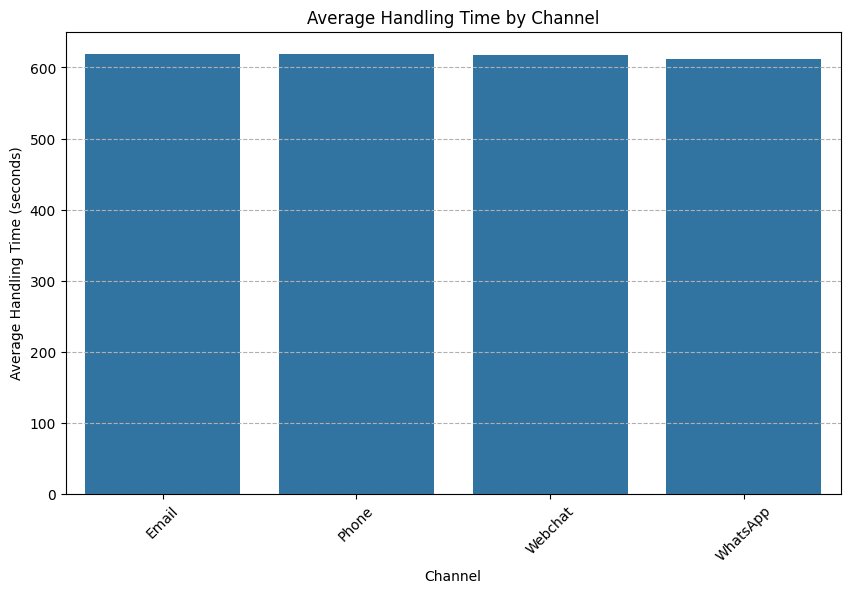

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average handling time by channel
avg_handling_time_channel = call.groupby('Channel')['Handling Time (sec)'].mean().reset_index()
avg_handling_time_channel = avg_handling_time_channel.sort_values(by='Handling Time (sec)', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Handling Time (sec)', data=avg_handling_time_channel)
plt.title('Average Handling Time by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Handling Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

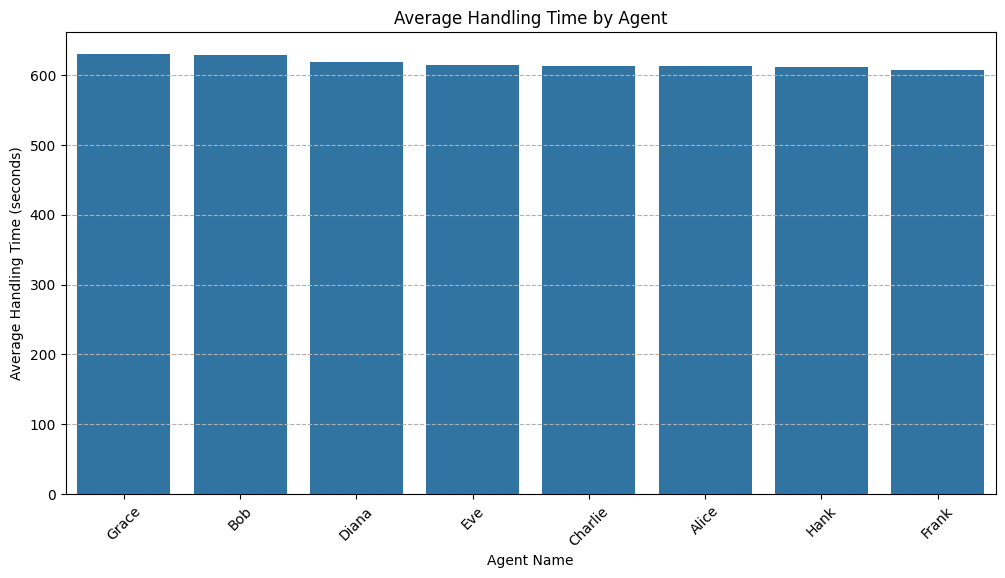

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average handling time by agent
avg_handling_time_agent = call.groupby('Agent Name')['Handling Time (sec)'].mean().reset_index()
avg_handling_time_agent = avg_handling_time_agent.sort_values(by='Handling Time (sec)', ascending=False)


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Name', y='Handling Time (sec)', data=avg_handling_time_agent)
plt.title('Average Handling Time by Agent')
plt.xlabel('Agent Name')
plt.ylabel('Average Handling Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

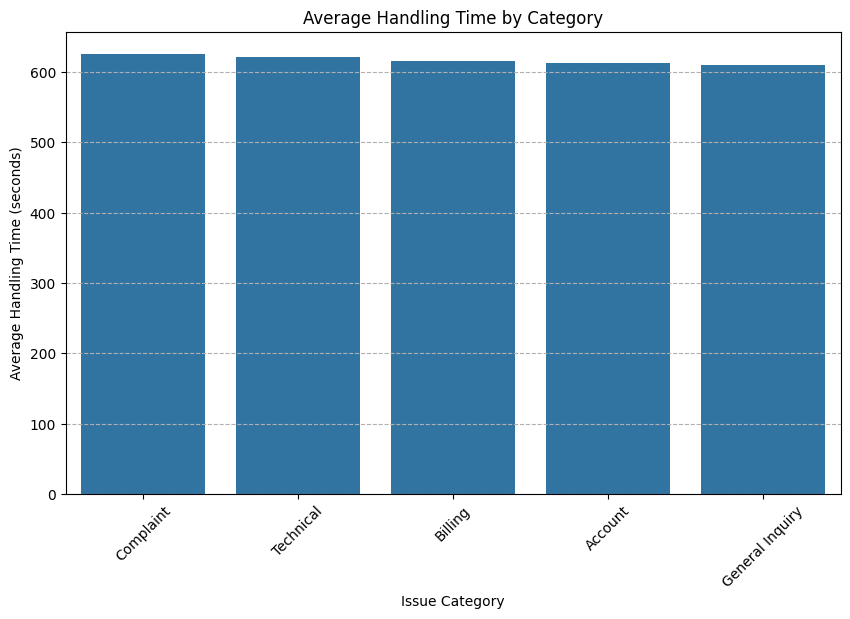

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average handling time by channel
avg_handling_time_cat = call.groupby('Issue Category')['Handling Time (sec)'].mean().reset_index()
avg_handling_time_cat = avg_handling_time_cat.sort_values(by='Handling Time (sec)', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Issue Category', y='Handling Time (sec)', data=avg_handling_time_cat)
plt.title('Average Handling Time by Category')
plt.xlabel('Issue Category')
plt.ylabel('Average Handling Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Lets create the same scatter plot like we create before with the average wait time

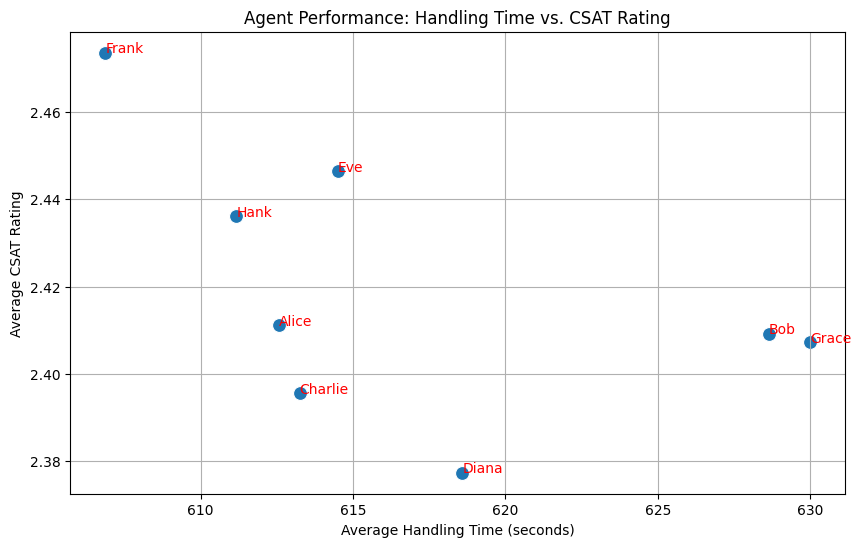

In [68]:
# Merge the average handling time and CSAT rating dataframes
agent_performance = pd.merge(avg_handling_time_agent, avg_csat_agent, on='Agent Name')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Handling Time (sec)', y='CSAT Rating', data=agent_performance, s=100)

# Add labels for each agent
for i in range(agent_performance.shape[0]):
    plt.text(x=agent_performance['Handling Time (sec)'][i]+0.0,
             y=agent_performance['CSAT Rating'][i]+0.0,
             s=agent_performance['Agent Name'][i],
             fontdict=dict(color='red',size=10))

plt.title('Agent Performance: Handling Time vs. CSAT Rating')
plt.xlabel('Average Handling Time (seconds)')
plt.ylabel('Average CSAT Rating')
plt.grid(True)
plt.show()

In [69]:
call.head()

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec),Start DateTime,End DateTime,Handling Time,Handling Time (sec)
0,CALL-000001,2025-07-17,18:17:15,18:31:40,Frank,Answered,5.0,Outbound,Phone,CUST-9436,Account,No,35.0,2025-07-17 18:17:15,2025-07-17 18:31:40,0 days 00:14:25,865.0
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN,2025-07-07 18:42:42,2025-07-07 18:43:51,0 days 00:01:09,69.0
2,CALL-000003,2025-07-03,15:38:43,15:48:47,Grace,Answered,4.0,Outbound,Email,CUST-1517,Account,Yes,79.0,2025-07-03 15:38:43,2025-07-03 15:48:47,0 days 00:10:04,604.0
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0,2025-07-05 08:38:36,2025-07-05 08:43:52,0 days 00:05:16,316.0
4,CALL-000005,2025-07-21,18:55:46,19:08:37,Bob,Answered,4.0,Inbound,Webchat,CUST-4984,Complaint,Yes,88.0,2025-07-21 18:55:46,2025-07-21 19:08:37,0 days 00:12:51,771.0


## Abandonment Rate

Abandonment Rate refers to percentage of callers who hang up before speaking to an agent, most likely because of long wait times or not enough agents available due to overload tickets

In [70]:
# Calculate the number of missed calls
missed_calls = call[call['Status'] == 'Missed'].shape[0]

# Calculate the total number of calls
total_calls = call.shape[0]

# Calculate the abandonment rate
abandonment_rate = (missed_calls / total_calls) * 100

print(f"Abandonment Rate: {abandonment_rate:.2f}%")

Abandonment Rate: 15.32%


Based on industry standard, the abandonment rate > 15% means that there is serious problem with the flow of the call center as tickets from customer is not sufficiently handled

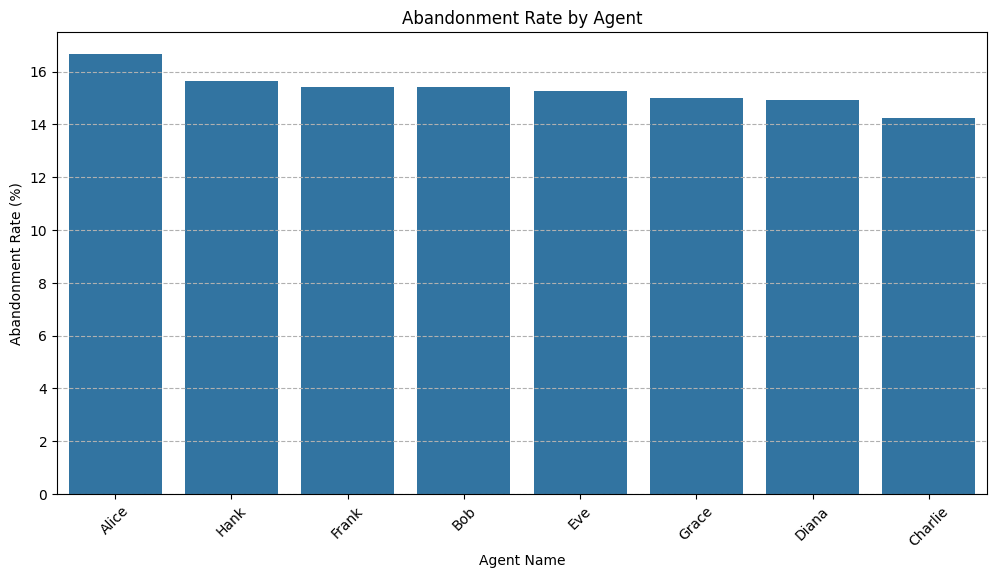

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate abandonment rate by agent
abandonment_by_agent = call.groupby('Agent Name')['Status'].apply(lambda x: (x == 'Missed').sum() / len(x) * 100).reset_index(name='Abandonment Rate')
abandonment_by_agent = abandonment_by_agent.sort_values(by='Abandonment Rate', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Name', y='Abandonment Rate', data=abandonment_by_agent)
plt.title('Abandonment Rate by Agent')
plt.xlabel('Agent Name')
plt.ylabel('Abandonment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

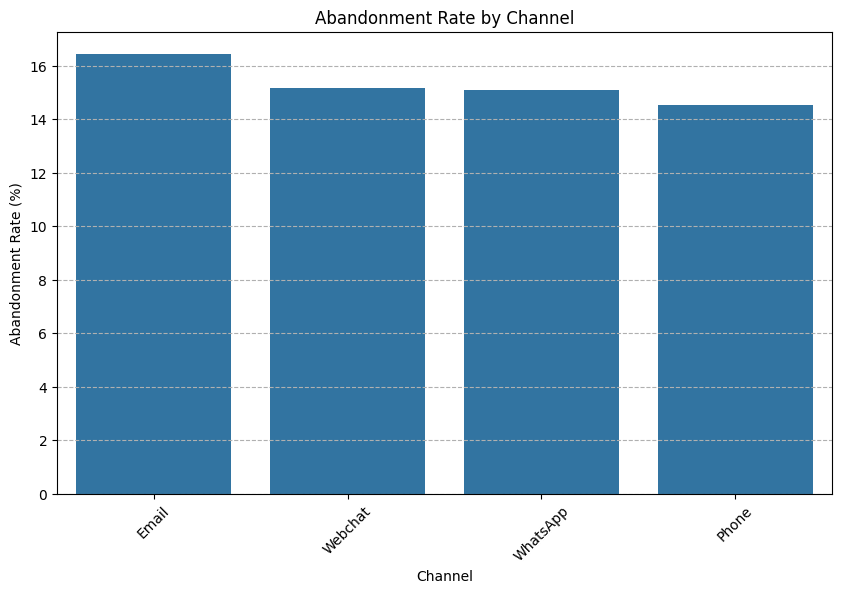

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate abandonment rate by channel
abandonment_by_channel = call.groupby('Channel')['Status'].apply(lambda x: (x == 'Missed').sum() / len(x) * 100).reset_index(name='Abandonment Rate')
abandonment_by_channel = abandonment_by_channel.sort_values(by='Abandonment Rate', ascending=False)


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Abandonment Rate', data=abandonment_by_channel)
plt.title('Abandonment Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Abandonment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# Key Findings and Recommendations

**Key Findings:**

- Abandonment Rate: The overall abandonment rate is 15.32%, which is quite high. The "Email" channel has the highest abandonment rate, and agent "Alice" has the highest individual abandonment rate.
- Average Wait Time: The overall average wait time is approximately 45 seconds. There is no significant variation in wait time across different agents or channels.
- Resolution Rate: The overall resolution rate is 50.58%. "Complaint" and "Account" related issues have the highest resolution rates, while "Billing" issues have the lowest. Agent "Diana" has the highest resolution rate.
- Customer Satisfaction (CSAT): The overall average CSAT rating is 3.61. When looking at low CSAT scores, there is no significant difference in the average low score across agents, channels, or issue categories. This suggests that the factors driving low satisfaction are likely more complex than can be explained by these variables alone.
- Agent Performance: There's no strong, direct correlation between an agent's average handling time or wait time and their average CSAT rating. This indicates that other factors, such as communication skills, problem-solving abilities, and product knowledge, may be more influential in determining customer satisfaction.

**Recommendations:**

- Investigate High Abandonment Rate for Email: The high abandonment rate for the "Email" channel is a major concern. It's crucial to investigate the root causes. This could involve analyzing email response times, the complexity of email inquiries, and the adequacy of staffing for the email channel.
- Improve Resolution Rate for Billing Issues: The low resolution rate for "Billing" issues indicates a need for improvement. This could involve providing agents with more comprehensive training on billing procedures, creating more detailed knowledge base articles on common billing inquiries, or empowering agents with the authority to resolve a wider range of billing issues.
- Recognize and Learn from High-Performing Agents: Agent "Diana" has the highest resolution rate. It's important to recognize her for her excellent performance and to identify the best practices she employs. These best practices can then be shared with the rest of the team to improve overall performance.
- Provide Targeted Coaching for Low-Performing Agents: Agent "Alice" has the highest abandonment rate. It would be beneficial to provide her with targeted coaching and support. This could involve reviewing her call handling procedures, providing additional training, or pairing her with a more experienced agent for mentorship.
- Conduct Deeper Dive into Low CSAT Scores: Since the initial analysis didn't reveal a clear driver for low CSAT scores, a more in-depth qualitative analysis is recommended. This could involve listening to call recordings for low-rated interactions to identify specific areas for improvement in agent communication and problem-solving skills.

,Call ID,Date,Start Time,End Time,Agent Name,Status,CSAT Rating,Call Type,Channel,Customer ID,Issue Category,Resolved During Call,Wait Time (sec),Start DateTime,End DateTime,Handling Time,Handling Time (sec)
0,CALL-000001,2025-07-17,18:17:15,18:31:40,Frank,Answered,5.0,Outbound,Phone,CUST-9436,Account,No,35.0,2025-07-17 18:17:15,2025-07-17 18:31:40,0 days 00:14:25,865.0
1,CALL-000002,2025-07-07,18:42:42,18:43:51,Frank,Missed,NaN,Inbound,Phone,CUST-2797,Technical,NaN,NaN,2025-07-07 18:42:42,2025-07-07 18:43:51,0 days 00:01:09,69.0
2,CALL-000003,2025-07-03,15:38:43,15:48:47,Grace,Answered,4.0,Outbound,Email,CUST-1517,Account,Yes,79.0,2025-07-03 15:38:43,2025-07-03 15:48:47,0 days 00:10:04,604.0
3,CALL-000004,2025-07-05,08:38:36,08:43:52,Bob,Answered,NaN,Inbound,Email,CUST-9119,Technical,No,3.0,2025-07-05 08:38:36,2025-07-05 08:43:52,0 days 00:05:16,316.0
4,CALL-000005,2025-07-21,18:55:46,19:08:37,Bob,Answered,4.0,Inbound,Webchat,CUST-4984,Complaint,Yes,88.0,2025-07-21 18:55:46,2025-07-21 19:08:37,0 days 00:12:51,771.0


In [76]:
call.to_csv('/content/drive/My Drive/call_center_analysis_results.csv', index=False)